In [1]:
import sys
import pandas as pd
Yourdir = '/Users/jacob/Documents/GitHub/'
sys.path.append(Yourdir)
from PyWPEM import WPEM


██╗    ██╗██████╗ ███████╗███╗   ███╗
██║    ██║██╔══██╗██╔════╝████╗ ████║
██║ █╗ ██║██████╔╝█████╗  ██╔████╔██║
██║███╗██║██╔═══╝ ██╔══╝  ██║╚██╔╝██║
╚███╔███╔╝██║     ███████╗██║ ╚═╝ ██║
 ╚══╝╚══╝ ╚═╝     ╚══════╝╚═╝     ╚═╝                                                  

A Diffraction Refinement Software : WPEM
Bin Cao, Advanced Materials Thrust, Hong Kong University of Science and Technology (Guangzhou)
URL : https://github.com/Bin-Cao/WPEM
Executed on : 2023-11-06 14:17:06  | Have a great day.


# background intensity

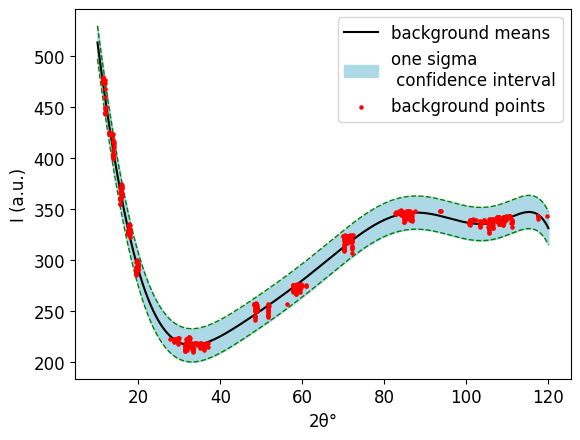

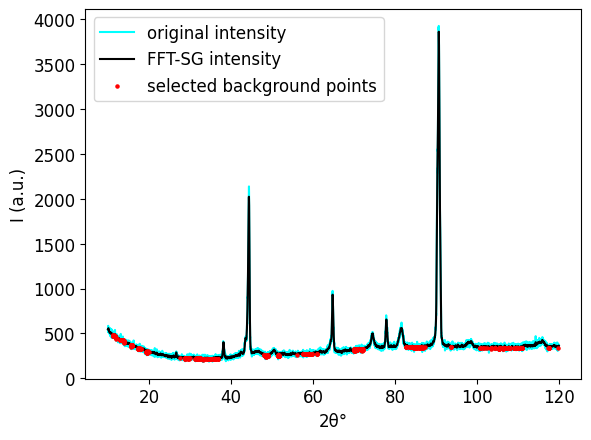

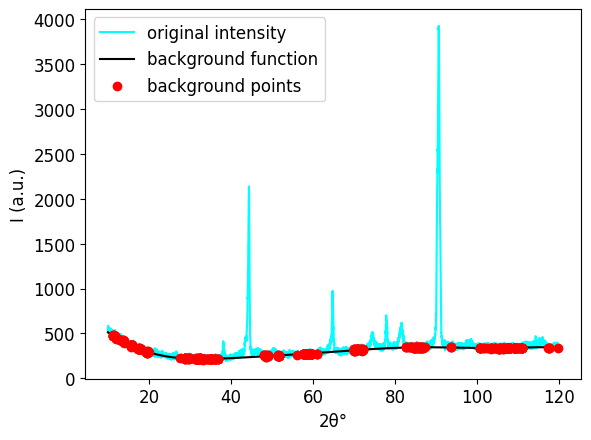

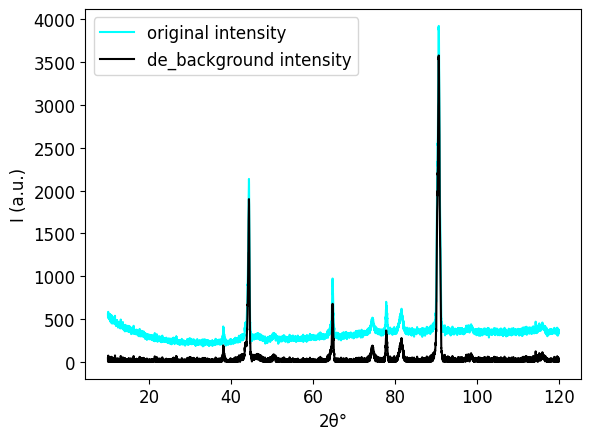

16.294916539266566

<Figure size 640x480 with 0 Axes>

In [2]:
intensity_csv = pd.read_csv(r'intensity.csv',header=None )
var = WPEM.BackgroundFit(intensity_csv,lowAngleRange=20,poly_n=8,bac_split=8,bac_num=500)
var

# WPEM fitting

Started at Mon Nov  6 14:21:19 2023 

Initialization
--------------------------------------------------------------------------------
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM


The input crystal system is: Cubic  |  The initial lattice constants : 3.54 3.54 3.54 90 90 90
The input crystal system is: Cubic  |  The initial lattice constants : 3.6 3.6 3.6 90 90 90
—————————— Initilize the parameters by WPEM ——————————
Parameter initialization has been completed 

WPEM 1-th iteration
[array([ 3.54003,  3.54003,  3.54003, 90.     , 90.     , 90.     ]), array([ 3.60004,  3.60004,  3.60004, 90.     , 90.     , 90.     ])]
Rp:10.587 | Rwp:17.635 | Rsquare:15.589
WPEM 2-th iteration
[array([ 3.54004,  3.54004,  3.54004, 90.     , 90.     , 90.     ]), array([ 3.59997,  3.59997,  3.59997, 90.     , 90.     , 90.     ])]
Rp:9.632 | Rwp:15.246 | Rsquare:11.440

Rp:7.045 | Rwp:9.850 | Rsquare:4.335
WPEM 40-th iteration
[array([ 3.53397,  3.53397,  3.53397, 90.     , 90.     , 90.     ]), array([ 3.60101,  3.60101,  3.60101, 90.     , 90.     , 90.     ])]
Rp:7.033 | Rwp:9.826 | Rsquare:4.286
WPEM 41-th iteration
[array([ 3.53385,  3.53385,  3.53385, 90.     , 90.     , 90.     ]), array([ 3.60099,  3.60099,  3.60099, 90.     , 90.     , 90.     ])]
Rp:7.018 | Rwp:9.801 | Rsquare:4.236
WPEM 42-th iteration
[array([ 3.53376,  3.53376,  3.53376, 90.     , 90.     , 90.     ]), array([ 3.60097,  3.60097,  3.60097, 90.     , 90.     , 90.     ])]
Rp:7.003 | Rwp:9.776 | Rsquare:4.188
WPEM 43-th iteration
[array([ 3.5337,  3.5337,  3.5337, 90.    , 90.    , 90.    ]), array([ 3.60096,  3.60096,  3.60096, 90.     , 90.     , 90.     ])]
Rp:6.988 | Rwp:9.750 | Rsquare:4.141
After update the background :   Rp = 4.334 | Rwp = 8.249 | Rsquare = 3.402


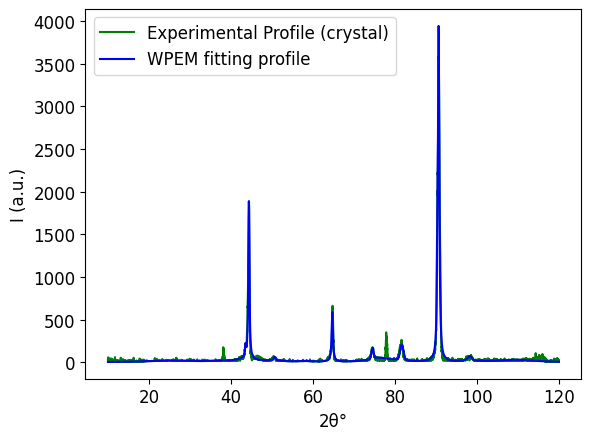

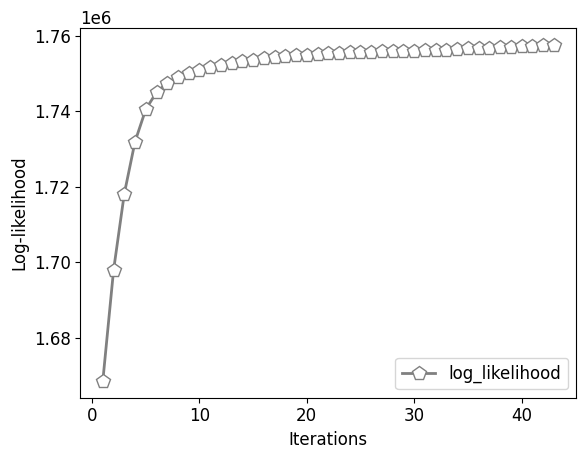

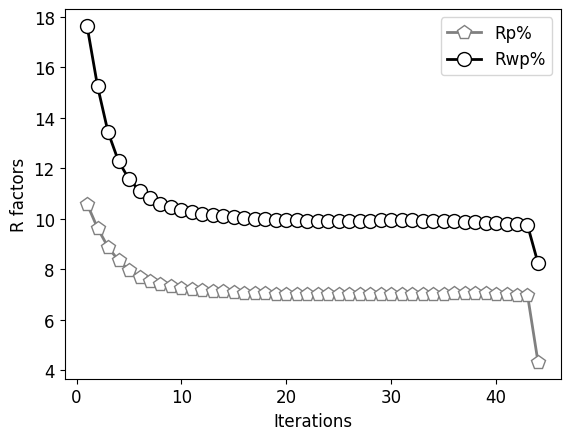

volume fraction without structure factor estimate in % : [14.915622285034036, 85.08437771496598] 
 Saved at the result documents
43-th iterations, reach the limit of ϵ.
 Rp: 4.334
Rwp: 8.249 


WPEM program running time :  0 hours 2 minute  32 second  


'0 hours 2 minute  32 second  '

<Figure size 640x480 with 0 Axes>

In [5]:
# The wavelength is set according to the actual light source
wavelength = [1.540593, 1.544414]

# Enter the file name to read on the right side of the equal sign. 
# Please remember to quote, string.

# The file name of non-background data (2theta-intensity data)
no_bac_intensity_file = "no_bac_intensity.csv" 
# The file name of raw/original data (2theta-intensity data)
original_file = "intensity.csv"  
# The file name of background data (2theta-intensity data)
bacground_file = "bac.csv"  


# Input the initial lattice constants {a, b, c, α, β, γ}, whose values need to be assumed at initialization.

Lattice_constants = [[  3.54,   3.54,  3.54, 90, 90, 90],[ 3.6,  3.6, 3.6, 90, 90, 90],
                    
                    ]

# Execute the model
WPEM.XRDfit(
    wavelength, var, Lattice_constants,no_bac_intensity_file, original_file, bacground_file, 
    InitializationEpoch=0,subset_number=5,low_bound=35,up_bound=100,bta = 0.95,iter_max = 100, asy_C = 0,
    )

Name assigned successfully


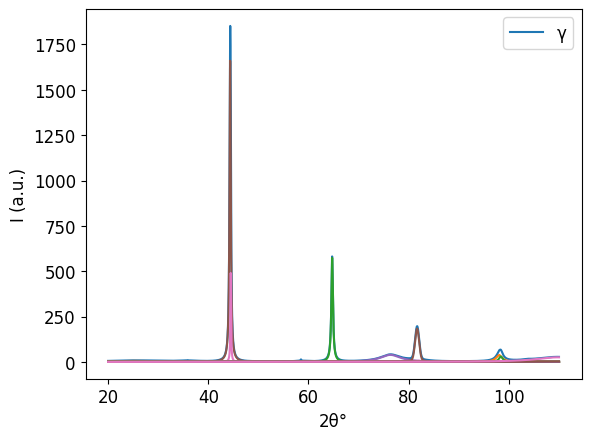

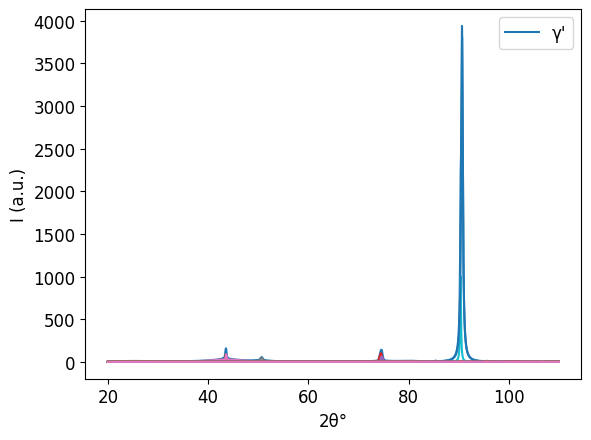

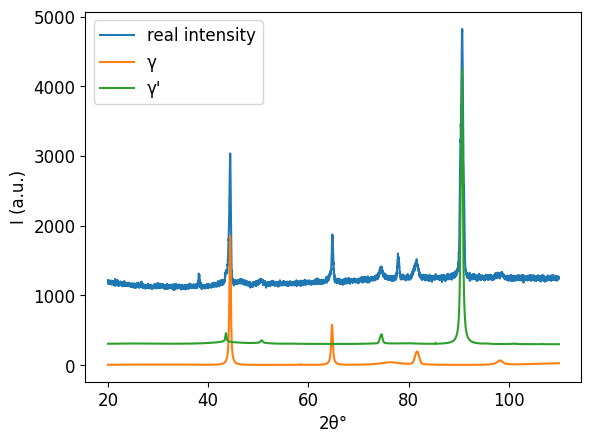

volume fraction estimate in % (calculated by integral area): [40.23641308504266, 59.763586914957344] 
 Saved at the DecomposedComponents document


In [6]:
name = ['γ','γ\'','\u03B2',]
wavelength = [1.540593*2/3+ 1.544414*1/3]
WPEM.Plot_Components(lowboundary=20,lifting=[0,300,900,], upboundary=110,name = name, wavelength = wavelength, phase=2)